In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv(Path('../resources/regressiondata_allcolumns.csv'))
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
df.head()

,Unnamed:_0,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,homeType_Apartment,homeType_Condo,homeType_Mobile_/_Manufactured,homeType_MultiFamily,homeType_Multiple_Occupancy,homeType_Other,homeType_Residential,homeType_Single_Family,homeType_Townhouse,homeType_Vacant_Land
0,0,111373431,78660,30.430632,-97.663078,1.98,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,120900430,78660,30.432673,-97.661697,1.98,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,2084491383,78660,30.409748,-97.639771,1.98,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,120901374,78660,30.432112,-97.661659,1.98,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,4,60134862,78660,30.437368,-97.656860,1.98,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.columns

Index(['Unnamed:_0', 'zpid', 'zipcode', 'latitude', 'longitude',
       'propertyTaxRate', 'garageSpaces', 'hasAssociation', 'hasCooling',
       'hasGarage', 'hasHeating', 'hasSpa', 'hasView', 'parkingSpaces',
       'yearBuilt', 'latestPrice', 'numPriceChanges', 'latest_saledate',
       'latest_salemonth', 'latest_saleyear', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'city_austin', 'city_del_valle',
       'city_driftwood', 'city_dripping_springs', 'city_manchaca',
       'city_manor', 'city_pflugerv

In [4]:
# Save 'zpid'
id_df = df['zpid']

# Drop 'zpid' column
df.drop(["zpid","latest_saledate","Unnamed:_0",'latest_salemonth','latest_saleyear'], axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nData size: {} ".format(df.shape)) 


Data size: (15171, 56) 


In [5]:
# Create features and target
y = df["latestPrice"]
X = df.drop(columns=['latestPrice'])

In [6]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(11378, 55)

In [7]:
# Create DMatrices

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# "Learn" the mean from the training data
mean_train = np.mean(y_train)

# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 240070.42


In [9]:
# Create parameters dictionary
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [10]:
params['eval_metric'] = "mae"

num_boost_round = 999

In [11]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-mae:371566
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:267542
[2]	Test-mae:201014
[3]	Test-mae:159385
[4]	Test-mae:136640
[5]	Test-mae:123461
[6]	Test-mae:114951
[7]	Test-mae:110864
[8]	Test-mae:109062
[9]	Test-mae:107827
[10]	Test-mae:106957
[11]	Test-mae:105827
[12]	Test-mae:104477
[13]	Test-mae:104227
[14]	Test-mae:103635
[15]	Test-mae:103551
[16]	Test-mae:103375
[17]	Test-mae:102591
[18]	Test-mae:102440
[19]	Test-mae:101776
[20]	Test-mae:101758
[21]	Test-mae:101700
[22]	Test-mae:101824
[23]	Test-mae:101519
[24]	Test-mae:101303
[25]	Test-mae:101179
[26]	Test-mae:100792
[27]	Test-mae:100472
[28]	Test-mae:100596
[29]	Test-mae:100545
[30]	Test-mae:100639
[31]	Test-mae:100400
[32]	Test-mae:100211
[33]	Test-mae:100158
[34]	Test-mae:100128
[35]	Test-mae:100027
[36]	Test-mae:100059
[37]	Test-mae:99896.6
[38]	Test-mae:99861.5
[39]	Test-mae:99645.6
[40]	Test-mae:99450.2
[41]	Test-mae:99427.6
[42]	Test-mae:99490.4
[43]	Test-mae:99500.9
[44]	Test-mae:99314.1
[

In [12]:
# Get cross validation score with current params
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,358484.893750,1623.352897,360220.612500,7915.181948
1,255434.815625,1233.728606,258420.290625,7820.609446
2,187717.687500,1128.595012,194326.350000,7356.692185
3,144960.340625,1168.091607,155461.981250,6582.401245
4,119206.295313,956.145706,132781.520312,5962.229816
...,...,...,...,...
63,49926.573437,1134.422408,96848.732813,5131.963443
64,49705.053125,1143.101578,96838.431250,5109.662689
65,49545.933594,1122.039642,96848.890625,5122.438055
66,49202.055469,1105.104906,96827.792187,5102.683086


In [13]:
cv_results['test-mae-mean'].min()

96804.6515622

In [14]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(4,12)
    for min_child_weight in range(1,10)
]

In [15]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=4, min_child_weight=1
	MAE 98404.7078126 for 90 rounds
CV with max_depth=4, min_child_weight=2
	MAE 98051.159375 for 122 rounds
CV with max_depth=4, min_child_weight=3
	MAE 99152.59375 for 84 rounds
CV with max_depth=4, min_child_weight=4
	MAE 99687.9734374 for 104 rounds
CV with max_depth=4, min_child_weight=5
	MAE 99734.1515624 for 79 rounds
CV with max_depth=4, min_child_weight=6
	MAE 98773.7203128 for 143 rounds
CV with max_depth=4, min_child_weight=7
	MAE 100584.840625 for 70 rounds
CV with max_depth=4, min_child_weight=8
	MAE 100487.6687498 for 78 rounds
CV with max_depth=4, min_child_weight=9
	MAE 98133.1609376 for 150 rounds
CV with max_depth=5, min_child_weight=1
	MAE 96273.946875 for 103 rounds
CV with max_depth=5, min_child_weight=2
	MAE 98672.00156219999 for 40 rounds
CV with max_depth=5, min_child_weight=3
	MAE 97922.446875 for 63 rounds
CV with max_depth=5, min_child_weight=4
	MAE 98264.6015626 for 59 rounds
CV with max_depth=5, min_child_weight=5
	MAE 9

In [31]:
# Update parameters with best found parameters
params['max_depth'] = 5
params['min_child_weight'] = 1

In [17]:
# Tuning 'subsample' and 'colsample_bytree' parameters
# Create list of possible params
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [18]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 96804.646875 for 67 rounds
CV with subsample=1.0, colsample=0.9
	MAE 97226.1140624 for 81 rounds
CV with subsample=1.0, colsample=0.8
	MAE 95866.9734376 for 60 rounds
CV with subsample=1.0, colsample=0.7
	MAE 96673.2359376 for 75 rounds
CV with subsample=0.9, colsample=1.0
	MAE 98961.9187502 for 79 rounds
CV with subsample=0.9, colsample=0.9
	MAE 97120.4250002 for 74 rounds
CV with subsample=0.9, colsample=0.8
	MAE 96546.5953126 for 83 rounds
CV with subsample=0.9, colsample=0.7
	MAE 98467.5546876 for 44 rounds
CV with subsample=0.8, colsample=1.0
	MAE 98586.1953126 for 69 rounds
CV with subsample=0.8, colsample=0.9
	MAE 98474.88125020001 for 56 rounds
CV with subsample=0.8, colsample=0.8
	MAE 99321.159375 for 85 rounds
CV with subsample=0.8, colsample=0.7
	MAE 100461.1062502 for 77 rounds
CV with subsample=0.7, colsample=1.0
	MAE 101847.9953124 for 43 rounds
CV with subsample=0.7, colsample=0.9
	MAE 101717.8312502 for 43 rounds
CV with subsamp

In [32]:
# Update params dictionary
params['subsample'] = 1.0
params['colsample_bytree'] = 0.8

In [20]:
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
	MAE 97226.1171876 for 81 rounds

CV with eta=0.2
	MAE 94575.2015624 for 83 rounds

CV with eta=0.1
	MAE 92549.5437498 for 262 rounds

CV with eta=0.05
	MAE 91609.5359376 for 540 rounds

CV with eta=0.01
	MAE 92441.0703124 for 998 rounds

CV with eta=0.005
	MAE 96320.3656248 for 998 rounds

Best params: 0.05, MAE: 91609.5359376


In [21]:
# Update parameters dictionary
params['eta'] = .05

In [33]:
params

{'max_depth': 5,
 'min_child_weight': 1,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 0.8,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [35]:
# Train the model with the tuned parameters and use test data
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[0]	Test-mae:499012
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:474897
[2]	Test-mae:451888
[3]	Test-mae:429999
[4]	Test-mae:409054
[5]	Test-mae:389298
[6]	Test-mae:370499
[7]	Test-mae:352758
[8]	Test-mae:335840
[9]	Test-mae:320057
[10]	Test-mae:305263
[11]	Test-mae:291088
[12]	Test-mae:277768
[13]	Test-mae:265491
[14]	Test-mae:253910
[15]	Test-mae:242992
[16]	Test-mae:232509
[17]	Test-mae:222704
[18]	Test-mae:213766
[19]	Test-mae:205344
[20]	Test-mae:197647
[21]	Test-mae:190339
[22]	Test-mae:183642
[23]	Test-mae:177193
[24]	Test-mae:171534
[25]	Test-mae:166226
[26]	Test-mae:161295
[27]	Test-mae:156448
[28]	Test-mae:152201
[29]	Test-mae:148257
[30]	Test-mae:144736
[31]	Test-mae:141304
[32]	Test-mae:138155
[33]	Test-mae:135485
[34]	Test-mae:132894
[35]	Test-mae:130881
[36]	Test-mae:128718
[37]	Test-mae:126783
[38]	Test-mae:124848
[39]	Test-mae:123187
[40]	Test-mae:121479
[41]	Test-mae:120210
[42]	Test-mae:118971
[43]	Test-mae:117720
[44]	Test-mae:116745
[45]	Test

In [36]:
# Save model with best parameters
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:499012
[1]	Test-mae:474897
[2]	Test-mae:451888
[3]	Test-mae:429999
[4]	Test-mae:409054
[5]	Test-mae:389298
[6]	Test-mae:370499
[7]	Test-mae:352758
[8]	Test-mae:335840
[9]	Test-mae:320057
[10]	Test-mae:305263
[11]	Test-mae:291088
[12]	Test-mae:277768
[13]	Test-mae:265491
[14]	Test-mae:253910
[15]	Test-mae:242992
[16]	Test-mae:232509
[17]	Test-mae:222704
[18]	Test-mae:213766
[19]	Test-mae:205344
[20]	Test-mae:197647
[21]	Test-mae:190339
[22]	Test-mae:183642
[23]	Test-mae:177193
[24]	Test-mae:171534
[25]	Test-mae:166226
[26]	Test-mae:161295
[27]	Test-mae:156448
[28]	Test-mae:152201
[29]	Test-mae:148257
[30]	Test-mae:144736
[31]	Test-mae:141304
[32]	Test-mae:138155
[33]	Test-mae:135485
[34]	Test-mae:132894
[35]	Test-mae:130881
[36]	Test-mae:128718
[37]	Test-mae:126783
[38]	Test-mae:124848
[39]	Test-mae:123187
[40]	Test-mae:121479
[41]	Test-mae:120210
[42]	Test-mae:118971
[43]	Test-mae:117720
[44]	Test-mae:116745
[45]	Test-mae:115695
[46]	Test-mae:114753
[47]	Test-mae:114036
[4

In [37]:
# Create prediction
y_pred = best_model.predict(dtest)

In [38]:
# Save model
best_model.save_model("xgboost_optimal.model")

In [39]:
# Calculate R squared and Adjusted R Square
import statsmodels.api as sm
result = sm.OLS(y_pred, y_test).fit()
print(result.rsquared, result.rsquared_adj)

0.8720696303392184 0.872035893427388


In [40]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_squared_log_error(y_test, y_pred))

63386906900.63811
251767.56522760852
0.0690303887486596


In [41]:
# Calculate Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

91495.533340611


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

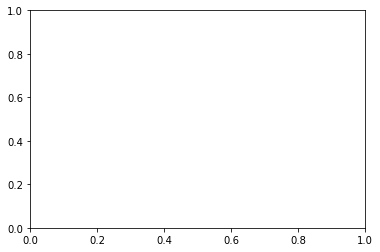

In [30]:
import matplotlib.pyplot as plt

# extra step to allow graphviz to be found 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/danny/.conda/envs/mlenv/lib/site-packages/graphviz'

xgb.plot_tree(model, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
xgb.plot_importance(best_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
# # Code to load model for other datasets:
# loaded_model = xgb.Booster()
# loaded_model.load_model("my_model.model")
# # And use it for predictions.
# loaded_model.predict(dtest)